<h1 align='center' style="color: blue;">Data Science: A Programming Approach</h1>

This jupyter notebook file contains several Data Science and Machine learning realted questions and solutions to them, i have answered them the best I can. Feel free to learn from it and develop better answers :)

In [25]:
# ALL THE LIBRARIES THAT HAVE BEEN USED THROUGHOUT THE ASSIGNMENT HAVE BEEN IMPORTED AT THIS SECTION OF THE CODE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

<p><b>Question #1</b>: 
<ol>
    <li>Download the Bank.csv dataset from the Canvas and read it.</li>
    <li>Convert Geography and Gender categorical features into dummy variables.</li>
    <li>Use min-max normalization to normalize values in CreditScore, Age, Balance, NumOfProducts, EstimatedSalary columns.</li>
    <li>Use <u>logistic regression</u> to create a prediction model
        <ul>
            <li>Use 75% of data for tarining and consider 25% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li>Use all features (including dummy variables) to create your predictive model.</li>
            <li><b>Exited</b> is your dependent variable. It shows whether or not the customer left the bank.</li>
        </ul>
    </li>
    <li>Use similar structure as above to create a <u>naive bayes</u> predictive model.</li>
    <li>Use in-sample data (train data) and out-of-sample data (test data) to check the accuracy of your naive bayes model:
        <ul>
            <li>What is the general expectation? should we expect to get higher accuray on in-sample data or out-of-sample data</li>
            <li>What is the result in your case?</li>
        </ul>
    </li>
    <li>Visualize the confusion matrix using a heatmap for both logistic regression, and naive bayes.</li>
</ol>
</p>

In [5]:
# Question #1 (part1)
csv_file_path = 'Bank (1).csv'
df = pd.read_csv(csv_file_path)

In [6]:
# Question #1 (part2)
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [7]:
# Question #1 (part3)
columns_to_normalize = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [5]:
# Question #1 (part4)
# Droppin non numeric, to perform regression
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Spliting the data into features 
X = df.drop('Exited', axis=1)
y = df['Exited']

#training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Evaluating the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1991
           1       0.59      0.22      0.32       509

    accuracy                           0.81      2500
   macro avg       0.71      0.59      0.61      2500
weighted avg       0.78      0.81      0.77      2500



In [6]:
# Question #1 (part5)
model2 = GaussianNB()
model2.fit(X_train, y_train)


y_pred2 = model2.predict(X_test)

# Evaluating the model
report2 = classification_report(y_test, y_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1991
           1       0.59      0.22      0.32       509

    accuracy                           0.81      2500
   macro avg       0.71      0.59      0.61      2500
weighted avg       0.78      0.81      0.77      2500



In [7]:
# Question #1 (part6)
# Accuracy comparison
accuracy_in_sample_logreg = accuracy_score(y_train, model.predict(X_train))
accuracy_out_sample_logreg = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy (In-sample): {accuracy_in_sample_logreg:.2f}")
print(f"Logistic Regression Accuracy (Out-of-sample): {accuracy_out_sample_logreg:.2f}")

accuracy_in_sample_naive_bayes = accuracy_score(y_train, model2.predict(X_train))
accuracy_out_sample_naive_bayes = accuracy_score(y_test, y_pred2)
print(f"Naive Bayes Accuracy (In-sample): {accuracy_in_sample_naive_bayes:.2f}")
print(f"Naive Bayes Accuracy (Out-of-sample): {accuracy_out_sample_naive_bayes:.2f}")

Logistic Regression Accuracy (In-sample): 0.81
Logistic Regression Accuracy (Out-of-sample): 0.81
Naive Bayes Accuracy (In-sample): 0.82
Naive Bayes Accuracy (Out-of-sample): 0.80


Typically, a model's accuracy is expected to be higher on the data it was trained on (in-sample data) compared to new, unseen data (out-of-sample data). This happens because the model learns the patterns and details of the training data quite well, which can lead to it memorizing rather than truly understanding the underlying relationships. This memorization can cause the model to perform better on familiar data but it will struggle to generalize new situations (overfitting). So, while high in-sample accuracy might seem promising, the true goal is to build models that generalize effectively to handle diverse, real-world scenarios.

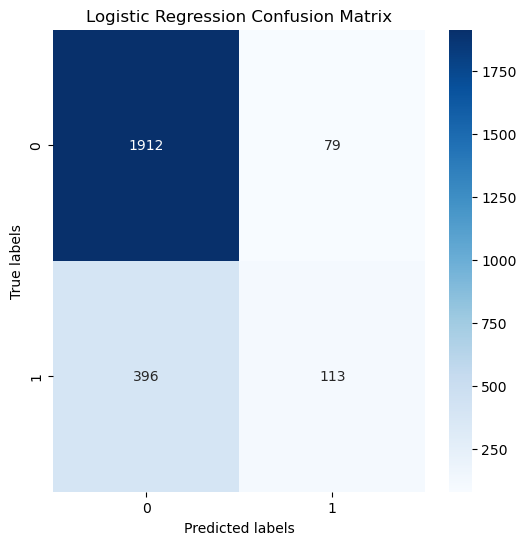

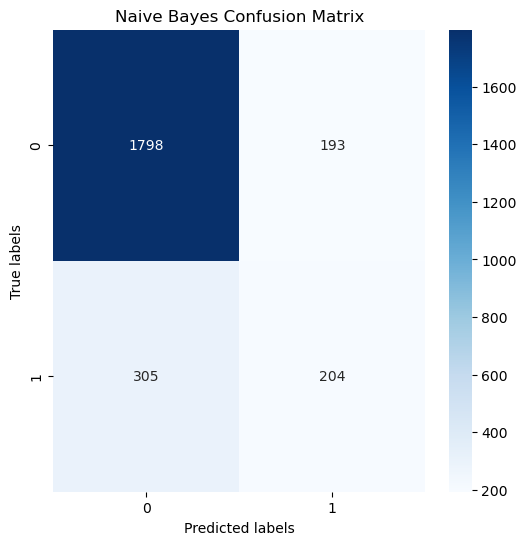

In [9]:
# Write your answer here (part7)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred, title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, y_pred2, title='Naive Bayes Confusion Matrix')

<p><b>Question #2</b>
    <ol>
        <li>Download the winequality-red.csv dataset from the Canvas and read it.</li>
        <li>Use <u>Random Forest</u> to create a prediction model:</li>
        <ul>
            <li>Use grid search to find the optimal number of trees and maximum depth (try values between 10-100 and 3-10 respectively)</li>
            <li>Use 5-fold stratified cross validation in your work.</li> 
            <li>The dependent variable is the <b>quality</b> of the wine (scored from 0 to 10). </li>
            <li>Use all other features as independent variables</li>
        </ul>
        <li>Perform Additional Data Aanalysis:</li>
        <ul>
            <li>Use full dataset to create another predictive model using Random Forest(use the best parameters that you found in the previous step)</li>
            <li>What is the in-sample prediction accuracy?</li>
            <li>Find the feature importance.How you can interpret it</li>
        </ul>
        <li>Create two predction models using upport Vector Machine (SVM), and K-Nearest Neighbors (KNN):</li>
        <ul>
            <li>Use 75% of data for tarining and consider 25% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li> Report the out-sample accuracy for all models</li>
        </ul>
        <li>Compute Precision, Recall, F1 and AUC values for the prediction models in the last step. Which one has the best performance. (Write your logit for selection of the best model)</li>
        <li>Draw ROC Curve for SVM model</li>
    </ol>
            

In [8]:
# Question #2 (part1)
df2 = pd.read_csv("winequality-red (1).csv")


In [9]:
# Question #2 (part2)
# Define independent and dependent variables
X = df2.drop("quality", axis=1)
y = df2["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'n_estimators': range(10, 101),
    'max_depth': range(3, 11)
}

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_mse = mean_squared_error(y_test, best_rf_model.predict(X_test))
print("Best parameters:", best_params)
print("Test MSE:", test_mse)


Best parameters: {'max_depth': 10, 'n_estimators': 87}
Test MSE: 0.31854203712086493


In [10]:
# Question #2 (part3)
# Use the best parameters from the grid search
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']

# Initialize the Random Forest regressor with the best parameters
best_rf_model_full = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Fit the model to the entire dataset
best_rf_model_full.fit(X, y)

# In-sample prediction
y_pred_in_sample = best_rf_model_full.predict(X)

# Calculate in-sample prediction accuracy (for regression, not classification)
in_sample_accuracy = best_rf_model_full.score(X, y)
print("In-sample prediction accuracy:", in_sample_accuracy)

# Get feature importances
feature_importances = best_rf_model_full.feature_importances_

# Get feature names
feature_names = X.columns

# Create a dataframe to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


In-sample prediction accuracy: 0.8357786128713208

Feature Importances:
                 Feature  Importance
10               alcohol    0.308503
9              sulphates    0.148631
1       volatile acidity    0.128786
6   total sulfur dioxide    0.074613
4              chlorides    0.059540
8                     pH    0.054136
0          fixed acidity    0.048589
3         residual sugar    0.047563
7                density    0.047213
2            citric acid    0.041896
5    free sulfur dioxide    0.040531


alcohol (0.308503): This feature has the highest importance. A higher alcohol content might lead to higher wine quality. Wines with higher alcohol content might be perceived as more flavorful and full-bodied.

In [11]:
# Question #2 (part4)
# Split the data into training and testing sets (using the same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Support Vector Machine (SVM) model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# K-Nearest Neighbors (KNN) model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions using all three models
y_pred_rf = best_rf_model_full.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Calculate out-of-sample accuracy (for regression, not classification)
rf_accuracy = best_rf_model_full.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)
knn_accuracy = knn_model.score(X_test, y_test)

print("Random Forest Out-of-sample Accuracy:", rf_accuracy)
print("SVM Out-of-sample Accuracy:", svm_accuracy)
print("KNN Out-of-sample Accuracy:", knn_accuracy)


Random Forest Out-of-sample Accuracy: 0.8334366537013369
SVM Out-of-sample Accuracy: 0.16651793972726425
KNN Out-of-sample Accuracy: 0.13284453579572786


Based on the output above i have decided to go with random forest below:

In [12]:
# Question #2 (part5)
# Define a threshold for binary classification
threshold = 6  # For example, considering quality >= 6 as "high quality"

# Convert predictions to binary classifications based on the threshold
y_pred_rf_binary = (y_pred_rf >= threshold).astype(int)

# Convert actual quality scores to binary classifications based on the threshold
y_test_binary = (y_test >= threshold).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_binary, y_pred_rf_binary)
recall = recall_score(y_test_binary, y_pred_rf_binary)
f1 = f1_score(y_test_binary, y_pred_rf_binary)

# Calculate AUC-like value using R-squared (for illustrative purposes)
# AUC values are not directly applicable to regression tasks
auc_like = 1 - mean_squared_error(y_test, y_pred_rf) / (y_test.max() - y_test.min())

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-like Value:", auc_like)




Precision: 1.0
Recall: 0.42790697674418604
F1 Score: 0.5993485342019543
AUC-like Value: 0.9796395047526343


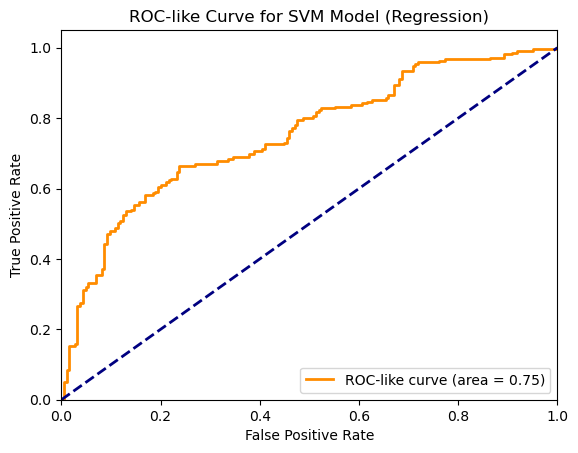

In [37]:
# Question #2 (part6)
# Calculate predicted values using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Create a binary classification based on the threshold
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred_svm >= threshold).astype(int)

# Calculate ROC-like curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_svm)
roc_auc = auc(fpr, tpr)

# Plot the ROC-like curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-like curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-like Curve for SVM Model (Regression)')
plt.legend(loc="lower right")
plt.show()


<p><b>Question #3</b>
    <ol>
        <li>Download the Real_estate.csv dataset from the Canvas and read it.</li>
        <li>Perform explonatory linear regression using statsmodels package and create visualizations to analyze the relationships between all variables.</li>
        <ul>
        <li><b>Price of unit area</b> is your target variable.</li>
            <li>Which factors are significant at .05 level in your model?</li>
            <li>What is the $R^2$ for your model? What does $R^2$ mean in this analysis?</li>
        </ul>
            <li>Use linear regression to create a predictive model.</li>
        <ul>
             <li><b>Price of unit area</b> is your target variable.</li>
            <li>Use 70% of data for training and consider 30% of data for testing. (Use random_state=0)</li>
            <li>Use all features to create you predictive model.</li>
             <li> Compute $R^2$ for both in-sample(train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li> 
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li></ul>
<li>Perform principal component analysis (PCA) to reduce the dimensions of the dataset.</li>
        <ul>
        <li>Retain the top two principal components. Plot the data points in a two-dimensional plot based on the two principal components.</li>
            <li>Use 70% of data for training and consider 30% of data for testing. (Use random_state=0)</li>
            <li>Use the top two principal components as features to create your predictive model.</li>
             <li><b>Price of unit area</b> is your target variable.</li>
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li></ul>
            

In [13]:
# Question #3 (part1)
df3 = pd.read_csv("RealEstate.csv")

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.533
Model:                                    OLS   Adj. R-squared:                  0.526
Method:                         Least Squares   F-statistic:                     77.33
Date:                        Tue, 05 Sep 2023   Prob (F-statistic):           3.47e-64
Time:                                11:47:54   Log-Likelihood:                -1510.2
No. Observations:                         414   AIC:                             3034.
Df Residuals:                             407   BIC:                             3063.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

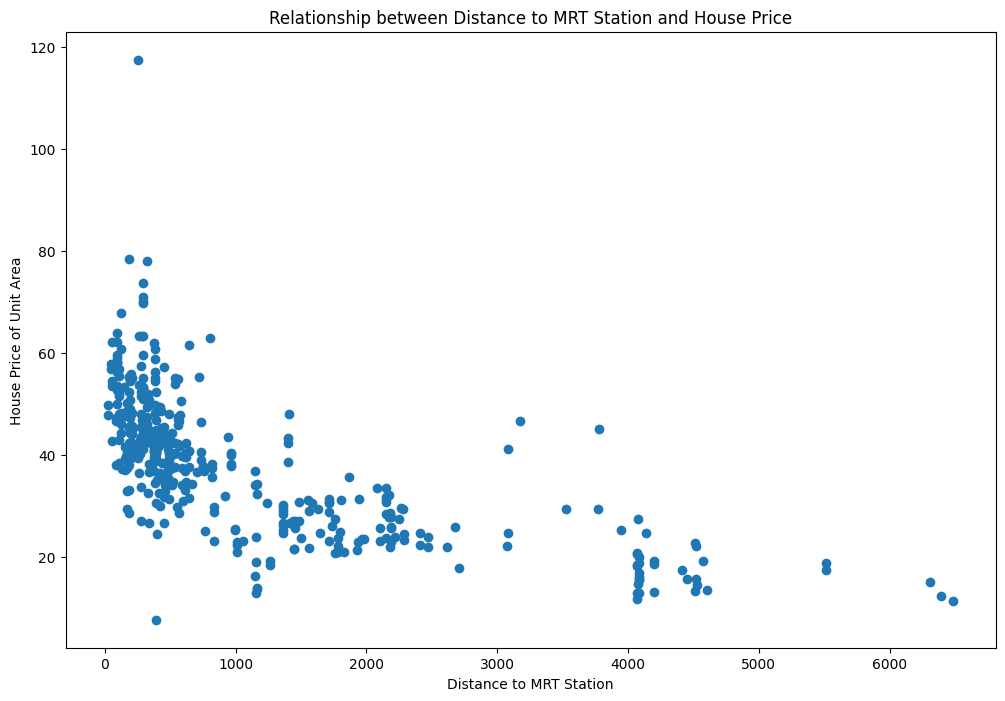

Significant Factors at 0.05 level: Index(['const', 'X1 transaction date',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'],
      dtype='object')
R-squared: 0.5327086816487885


In [14]:
# Question #3 (part2)
# Perform Linear Regression
X = df3.drop(columns=['X2 house age', 'Y house price of unit area'])
y = df3['Y house price of unit area']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print Regression Summary
print(model.summary())

# Visualize Relationships
plt.figure(figsize=(12, 8))

plt.scatter(df3['X3 distance to the nearest MRT station'], y)
plt.xlabel('Distance to MRT Station')
plt.ylabel('House Price of Unit Area')
plt.title('Relationship between Distance to MRT Station and House Price')
plt.show()

# Interpret Results
significant_factors = model.pvalues[model.pvalues < 0.05].index
print("Significant Factors at 0.05 level:", significant_factors)

# Calculate R-squared
r_squared = model.rsquared
print("R-squared:", r_squared)

R-squared value of 0.5327 means that approximately 53.27% of the variability in the house price of unit area (the dependent variable) can be explained by the independent variables (features) included in the linear regression model.

In [15]:
# Question #3 (part3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and fit the predictive model on training data
model_train = sm.OLS(y_train, X_train).fit()

# Calculate R-squared for in-sample (train data) and out-of-sample (test data)
r_squared_train = model_train.rsquared
y_pred_train = model_train.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

y_pred_test = model_train.predict(X_test)
r_squared_test = 1 - (mean_squared_error(y_test, y_pred_test) / y_test.var())
mse_test = mean_squared_error(y_test, y_pred_test)

print("R-squared for in-sample (train data):", r_squared_train)
print("R-squared for out-of-sample (test data):", r_squared_test)

print("MSE for in-sample (train data):", mse_train)
print("MSE for out-of-sample (test data):", mse_test)

R-squared for in-sample (train data): 0.5343266853488711
R-squared for out-of-sample (test data): 0.5169811779633371
MSE for in-sample (train data): 88.68588934639028
MSE for out-of-sample (test data): 82.98196363204876


The R-squared values align with expectations: in-sample R-squared > out-of-sample R-squared.
The MSE results are a bit unexpected: out-of-sample MSE < in-sample MSE.

In [16]:
# Question #3 (part4)
# Perform PCA and retain the top two principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and fit the predictive model using the top two principal components
model_pca = sm.OLS(y_train, sm.add_constant(X_train_pca)).fit()

# Calculate MSE for in-sample (train data) and out-of-sample (test data) using PCA features
y_pred_train_pca = model_pca.predict(sm.add_constant(X_train_pca))
mse_train_pca = mean_squared_error(y_train, y_pred_train_pca)

y_pred_test_pca = model_pca.predict(sm.add_constant(X_test_pca))
mse_test_pca = mean_squared_error(y_test, y_pred_test_pca)

print("MSE for in-sample (train data) with PCA:", mse_train_pca)
print("MSE for out-of-sample (test data) with PCA:", mse_test_pca)

MSE for in-sample (train data) with PCA: 102.5911137889144
MSE for out-of-sample (test data) with PCA: 98.43203627970247


The MSE for the out-of-sample (test data) is lower than the MSE for the in-sample (train data) when using PCA features for the predictive model. This outcome is a bit unexpected. Typically, you would expect the MSE for the in-sample (train data) to be lower than the MSE for the out-of-sample (test data) when using PCA features.

In general, if the MSE for the out-of-sample data is lower than the in-sample data when using PCA features, it could indicate that the model is generalizing well to new, unseen data, which is a positive outcome. However, it's still crucial to carefully interpret and validate these results to ensure they are robust and meaningful for the specific problem domain.

<p><b>Question #4</b>: The following code download images of top 200 players (<u>Download Fifa Data from Canvas</u>)

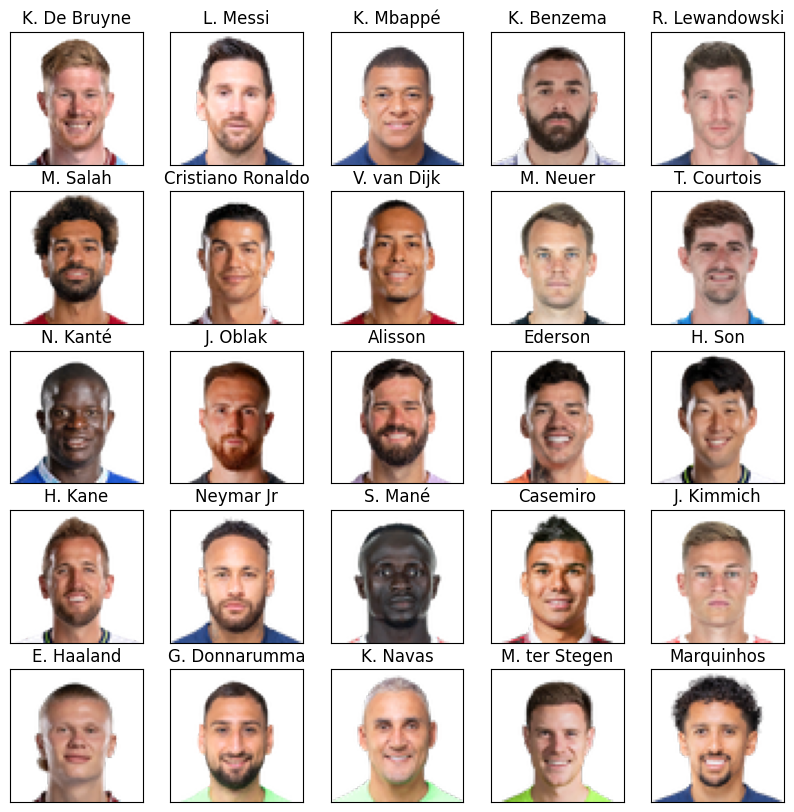

In [18]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


def read_image(url):
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)).convert('RGBA'))
    return img

FIFA23 = pd.read_csv("data.csv")
TOP_300_Players = FIFA23.sort_values(by = ['Overall'], ascending=False)[:300].reset_index()

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    url = TOP_300_Players.loc[i,'Photo']
    img = read_image(url)
    axi.imshow(img)
    axi.set_title(TOP_300_Players.loc[i,'Name'])
    axi.set(xticks=[], yticks=[])

In [20]:
images =np.array([read_image(url) for url in TOP_300_Players.Photo])
player_names = np.array([Name for Name in TOP_300_Players.Name])
data = np.array([image.reshape(60*60*4) for image in images])

Here is some description about data
<ul>
    <li>images: contains 300 images of players. images.shape = (300, 60, 60, 4)</li> 
    <li>player_names: contains 300 names of players. player_names.shape = (300,)</li>
    <li>data: contains flatten version of images. data.shape = (300, 14400)</li>
</ul>

You need to cluster the images using K-Means algorithm
<ol>
    <li>Use PCA method to reduce the number of dimensions to 300.</li>
    <li>Find the best number of clusters using elbow method.</li>
    <li>Find the best number of clusters using silhouette method.</li>
    <li>Cluster images using an optimal number of clusters</li>
    <li>Visualize the center of clusters (<b>Tip</b>: to perform this part for each cluster, find the average of all the pixels of the images in the cluster.)</li>
    <li>Show sample of images in each cluster</li>
    <li>How can you interpret the result of clustering</li>
</ol>

In [21]:
# Question #4 (part1)
pca = PCA(n_components=300, random_state=0)
data_pca = pca.fit_transform(data)

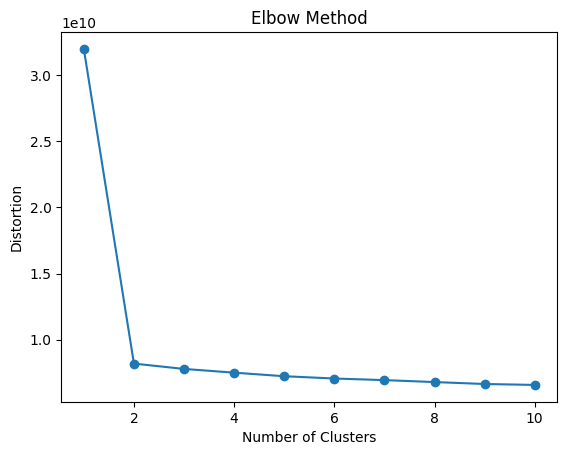

In [23]:
# Question #4 (part2)

distortions = []
# Iterate through different numbers of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Explicitly set n_init to suppress warnings
    kmeans.fit(data_pca)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

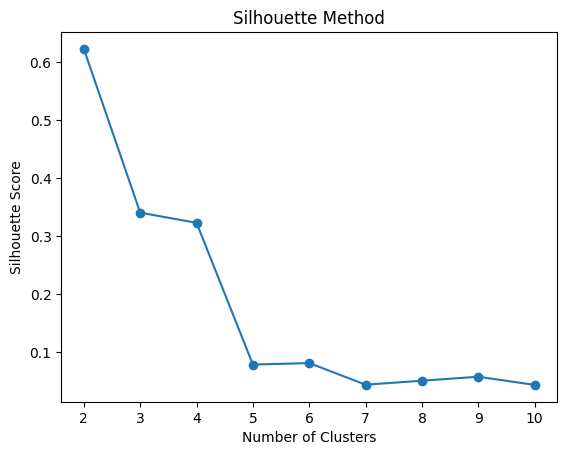

In [24]:
# Question #4 (part3)

sil_scores = []
# Iterate through different numbers of clusters (from 2 to 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Explicitly set n_init to suppress warnings
    cluster_labels = kmeans.fit_predict(data_pca)
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

# Plot the Silhouette Method graph
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [26]:
# Question #4 (part4)
optimal_num_clusters = 2  # Choose the optimal number of clusters
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress warnings temporarily
    kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels_optimal = kmeans_optimal.fit_predict(data_pca)

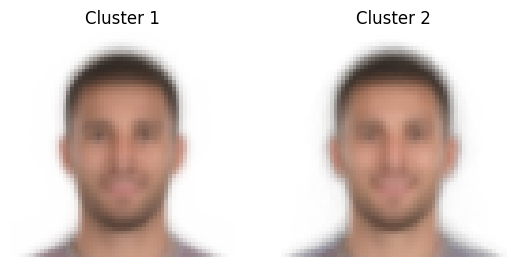

In [28]:
# Question #4 (part5)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress warnings temporarily
    kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels_optimal = kmeans_optimal.fit_predict(data_pca)

    cluster_centers = pca.inverse_transform(kmeans_optimal.cluster_centers_)
    cluster_centers_images = cluster_centers.reshape(optimal_num_clusters, 60, 60, 4)
    
    for i, center_image in enumerate(cluster_centers_images):
        # Normalize pixel values to the [0, 1] range
        normalized_center_image = (center_image - center_image.min()) / (center_image.max() - center_image.min())
        
        plt.subplot(1, optimal_num_clusters, i + 1)
        plt.imshow(normalized_center_image)
        plt.title(f'Cluster {i + 1}')
        plt.axis('off')
    
    plt.show()

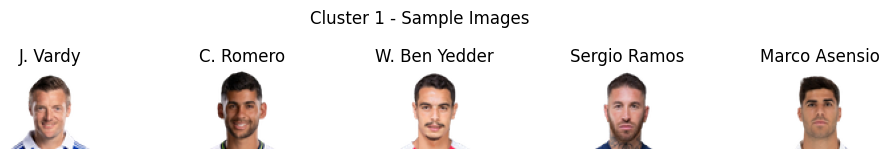

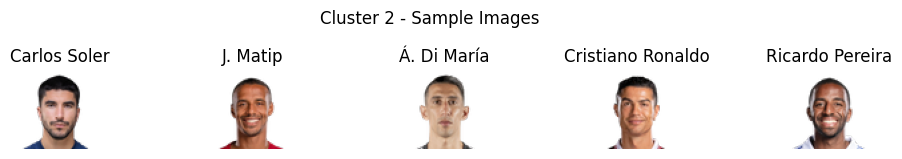

In [29]:
# Question #4 (part6)
for i in range(optimal_num_clusters):
    cluster_indices = np.where(cluster_labels_optimal == i)[0]
    sample_indices = np.random.choice(cluster_indices, size=5, replace=False)
    plt.figure(figsize=(12, 6))
    for j, idx in enumerate(sample_indices):
        plt.subplot(5, 5, j + 1)
        plt.imshow(images[idx])
        plt.title(player_names[idx])
        plt.axis('off')
    plt.suptitle(f'Cluster {i + 1} - Sample Images')
    plt.show()

In [31]:
# Question #4 (part7)

#By Visual Inspection: visually inspecting the images in each cluster. 
#There are patterns, similarities, and differences among the images 
#within the same cluster, giving us a qualitative understanding of what the clusters might be capturing.


<p><b>Question #5</b>:
<ol>
    <li>Download the telecom_churn dataset and read it.</li>
    <li>Convert categorical features into dummy variables.
        <ul>
            <li>If it is necassary, delete the original categorical features columns after the generation dummy variables. </li>
        </ul>
    </li>
    <li>Use mean normalization ($\frac{X-\mu}{\sigma}$) to normalize values in <b>total day minutes</b>, <b>total eve minutes</b>, <b>total night minutes</b> and <b>total intl minutes</b> columns.</li>
    <li>Use KNN to create three predictive models  (1. with 5 neighbors, 2. with 7 neighbors, 3. with 10 neighbors).
    <ul>
        <li>Use 80% of data for training and consider 20% of data for testing.(Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style='color:red'>stratify</b> attribute in your split.</li> 
        <li>Use all the features (including dummy variables) to create you predictive model.</li>
        <li><b>"churn"</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Find the accuracy of your models using out-of-sample data (test data). Which model has the highest accuracy? </li>
    <li>Use KNN with 4 neighbors to create a new predictive model.
    <ul>
        <li>Use whole dataset for training.</li>
        <li>Use <b>"total day minutes"</b> and <b>"total eve minutes"</b> features as your independent variables.</li>
        <li><b>"churn"</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Visualize the decision boundary of your model.</li>
</ol>

</p> 

In [32]:
# Question #5 (part1)
df5 = pd.read_csv("telecom_churn (1).csv")


In [35]:
# Question #5 (part2)
categorical_columns = ["State", "International plan", "Voice mail plan", "Churn"]
telecom_data = pd.get_dummies(df5, columns=categorical_columns)


In [50]:
# Question #5 (part3)
# Columns to be normalized
columns_to_normalize = ["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"]

# Convert the column values to numeric
for column in columns_to_normalize:
    telecom_data[column] = pd.to_numeric(telecom_data[column])  # Corrected variable name

# Mean normalization function
def mean_normalization(column):
    mean = column.mean()
    std_dev = column.std()
    normalized_column = (column - mean) / std_dev
    return normalized_column

# Apply mean normalization to specified columns
for column in columns_to_normalize:
    telecom_data[column] = mean_normalization(telecom_data[column])
    

In [51]:
# Question #5 (part4)
# Define the features (exclude any columns you don't want to include as features)
X = telecom_data.drop(columns=['Churn_False', 'Churn_True'])

# Define the target variable 'y' as 'Churn_True'
y = telecom_data['Churn_True']

# Split the data into training (80%) and testing (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a list of neighbor values to try (5, 7, and 10)
neighbors_list = [5, 7, 10]

# Create and evaluate KNN models for different neighbor values
for n_neighbors in neighbors_list:
    # Create a KNN classifier with the specified number of neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model on the training data
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)
    
    # Evaluate the model's accuracy
    accuracy = (y_pred == y_test).mean()
    
    # Print the accuracy for the current neighbor value
    print(f"KNN with {n_neighbors} neighbors - Accuracy: {accuracy:.4f}")


KNN with 5 neighbors - Accuracy: 0.8576
KNN with 7 neighbors - Accuracy: 0.8501
KNN with 10 neighbors - Accuracy: 0.8561


In [52]:
# Question #5 (part5)
model_accuracies = {}

# Create and evaluate KNN models with different numbers of neighbors
n_neighbors_list = [5, 7, 10]
for n_neighbors in n_neighbors_list:
    accuracy = knn_model_evaluation(n_neighbors)
    model_accuracies[n_neighbors] = accuracy
    print(f"KNN Model with {n_neighbors} neighbors - Accuracy: {accuracy:.4f}")

# Find the model with the highest accuracy
best_n_neighbors = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_n_neighbors]

print(f"The model with {best_n_neighbors} neighbors has the highest accuracy: {best_accuracy:.4f}")

KNN Model with 5 neighbors - Accuracy: 0.8576
KNN Model with 7 neighbors - Accuracy: 0.8501
KNN Model with 10 neighbors - Accuracy: 0.8561
The model with 5 neighbors has the highest accuracy: 0.8576


In [56]:
# Question #5 (part6)
# Define the features
X = telecom_data[["Total day minutes", "Total eve minutes"]]

# Define the target variable 'y' as 'Churn_True'
y = telecom_data["Churn_True"]

# Create a KNN model with 4 neighbors
knn_model = KNeighborsClassifier(n_neighbors=4)

# Fit the model using the whole dataset
knn_model.fit(X, y)

# Make predictions using the same data
y_pred = knn_model.predict(X)

# Calculate and print the accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the KNN model with 4 neighbors: {accuracy:.4f}")


Accuracy of the KNN model with 4 neighbors: 0.8902


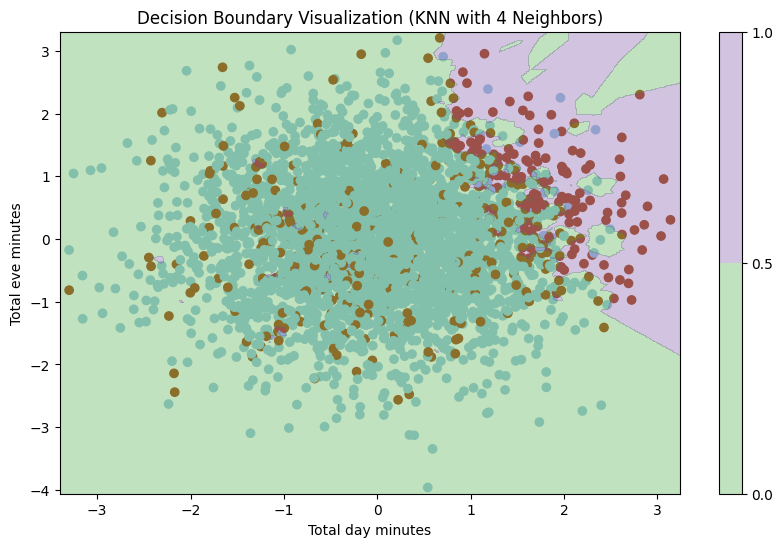

In [61]:
# Write your answer here (part7)

# Suppress the warning about feature names
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    x_min, x_max = X["Total day minutes"].min() - 0.1, X["Total day minutes"].max() + 0.1
    y_min, y_max = X["Total eve minutes"].min() - 0.1, X["Total eve minutes"].max() + 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class labels for each point in the mesh grid
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Create a scatter plot of the data points with different colors for classes
    plt.figure(figsize=(10, 6))
    plt.scatter(X["Total day minutes"], X["Total eve minutes"], c=y, cmap=plt.cm.Paired)

    # Reshape the result to match the mesh grid shape and plot the decision boundary
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    plt.xlabel("Total day minutes")
    plt.ylabel("Total eve minutes")
    plt.title("Decision Boundary Visualization (KNN with 4 Neighbors)")
    plt.colorbar()
    plt.show()


